### 데이터 로드 및 전처리

- CIFAR10 데이터셋을 로드하고, `훈련 데이터셋에서 20%를 검증 데이터셋`으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 `sklearn 라이브러리의 train_test_split 함수를 활용`합니다.
- `훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력`합니다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print(x_train_full.shape, y_train_full.shape)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  random_state=5, test_size=.2)
print()
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

(50000, 32, 32, 3) (50000, 1)

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

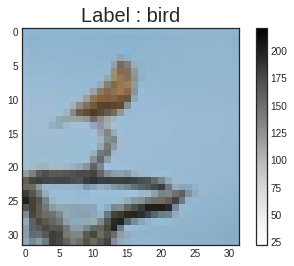

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.title(f'Label : {class_names[y_train[0].item()]}', fontsize = 20 )
plt.colorbar()
plt.show()


In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
import numpy as np

x_train = np.reshape(x_train, (-1,3072))
x_val = np.reshape(x_val, (-1,3072))
x_test = np.reshape(x_test, (-1,3072))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
def one_hot_encoding(data, dim=10):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

y_tr = one_hot_encoding(y_train)
y_tt = one_hot_encoding(y_test)
y_v = one_hot_encoding(y_val)

print(y_train[0])
print(y_tr[0])
print(class_names)

[2]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
x_train.shape, x_test.shape, x_val.shape

((40000, 3072), (10000, 3072), (10000, 3072))

In [10]:
y_tr.shape, y_tt.shape, y_v.shape

((40000, 10), (10000, 10), (10000, 10))

### 모델 구성 및 컴파일

In [13]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

model = models.Sequential()
# model.add(layers.Dense(512, input_shape=(3072,), name='input'))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, input_shape=(3072,), name='input'))
# model.add(layers.Dense(128, input_shape=(3072,), name='hidden_1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, name='hidden_2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                2064      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
activation_3 (Activation)    (None, 16)               

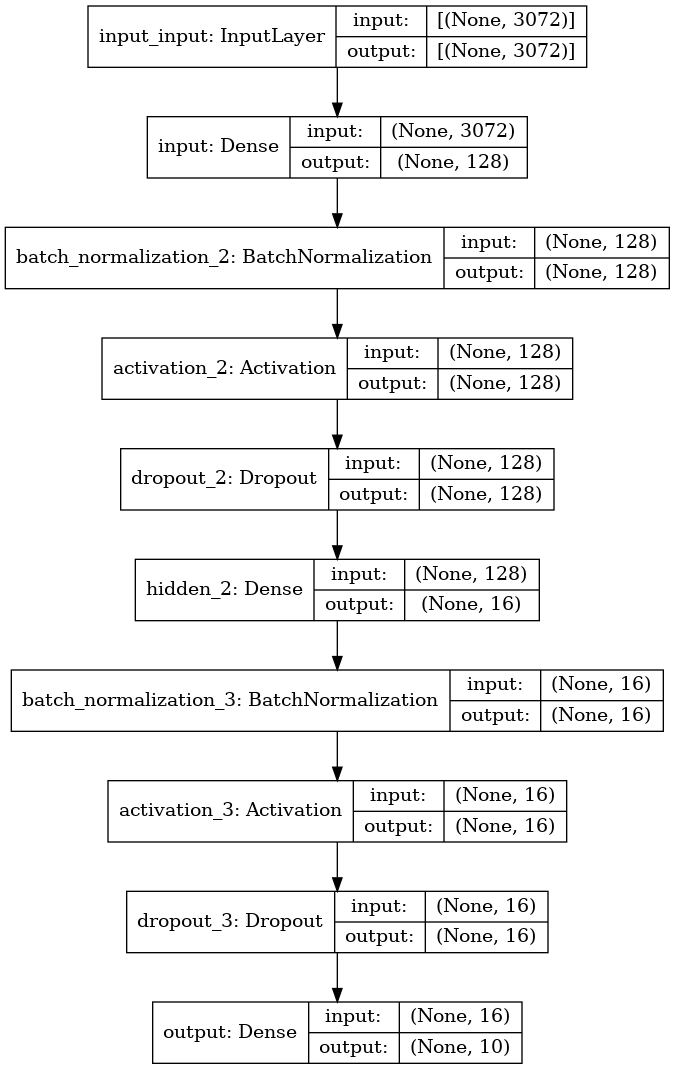

In [15]:
from tensorflow.keras import utils 

utils.plot_model(model, show_shapes=True)

In [16]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(np.array(x_train), np.array(y_tr), epochs=100, batch_size = 16,
                    callbacks=[check_point_cb,early_stopping_cb],
                    validation_data=(np.array(x_val), np.array(y_v)))                    

Epoch 1/100
2500/2500 [==============================] - 10s 3ms/step - loss: 1.9240 - accuracy: 0.3122 - val_loss: 1.7301 - val_accuracy: 0.3853
Epoch 2/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.7839 - accuracy: 0.3592 - val_loss: 1.6884 - val_accuracy: 0.4024
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.7271 - accuracy: 0.3760 - val_loss: 1.6258 - val_accuracy: 0.4252
Epoch 4/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6943 - accuracy: 0.3916 - val_loss: 1.5558 - val_accuracy: 0.4432
Epoch 5/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6621 - accuracy: 0.4023 - val_loss: 1.5499 - val_accuracy: 0.4488
Epoch 6/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6390 - accuracy: 0.4102 - val_loss: 1.5744 - val_accuracy: 0.4304
Epoch 7/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6221 - accuracy: 0.4180 - val_loss: 1.5795 - val_a

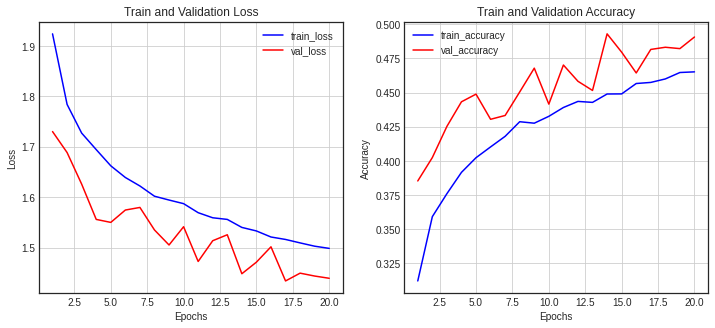

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [18]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.

loss, accuracy = model.evaluate(x_test, y_tt)
print('TESTSET Loss :',loss)
print('TESTSET Accuracy :',accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.4264 - accuracy: 0.4912
TESTSET Loss : 1.4263691902160645
TESTSET Accuracy : 0.4912000000476837


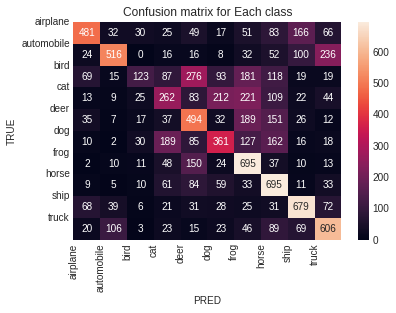

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

prob = model.predict(x_test)
pred = np.argmax(prob, axis =-1)
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=  True, fmt ='d')
plt.ylabel('TRUE')
plt.xlabel('PRED')
plt.yticks(range(10),
           labels = [class_names[x] for x in range(10)],
           rotation = 0)
plt.xticks(range(10),
           labels = [class_names[x] for x in range(10)],
           rotation = 90)
plt.title('Confusion matrix for Each class')
plt.show()